# Max Drawdown
_The maximum loss from the previous high to the subsequent low_


-> The worst possible return, bigh high, sell low

* Definied by only two data points, suceptible to outliers
* Sensitive to the granuality, weekly prices ignore daily lows and highs

**Calmar Ratio** _ratio of the annualised return over the trailing 36 months to the maximum drawdown over those trailing 36 months_

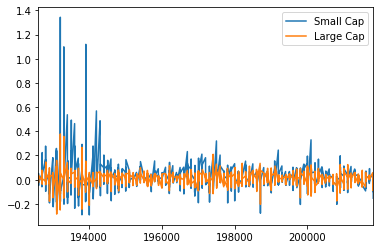

In [2]:
import pandas as pd
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
           header=0,index_col=0,parse_dates=True,na_values=-99.99)
returns = returns[['Lo 10', 'Hi 10']]
returns.columns = ['Small Cap', 'Large Cap']
returns = returns/100
returns.plot.line()

In [4]:
# Making the index nicer
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [5]:
#The index is still in timestamps, should be the period of that month
returns.index = returns.index.to_period('M')
returns.head()

,Small Cap,Large Cap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


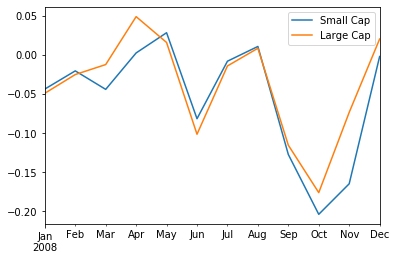

In [7]:
#It's now easier to extract subsets of the data
year_2008 = returns['2008']
year_2008.plot.line()

# Steps to calculate drawdowns
1. Create a wealth index (start with an index, e.g. 1000)
2. Compute the previous peaks
3. Compute drawdown (wealth value as a percentage of the previous peak)

In [9]:
wealth_index = 1000 * (1 + returns['Large Cap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: Large Cap, dtype: float64

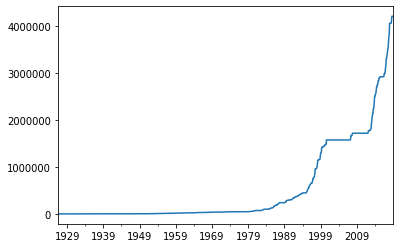

In [12]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

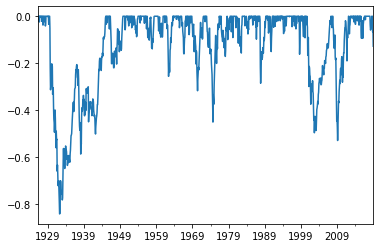

In [13]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

In [16]:
# The great crash was hard
drawdown.idxmin()

Period('1932-05', 'M')

In [17]:
#Since the 70s the worst was the GFC
drawdown["1970":].idxmin()

Period('2009-02', 'M')

In [24]:
# If I want to look at the small cap numbers its a bit of a pain to redo everything so I create a function
def drawdown(return_series: pd.Series):
    """
    Takes a timeseries and returns a DataFrame that includes:
    -The wealth index
    -The previous peaks
    -Percent drawdowns
    """
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })
    
    

In [25]:
#Checking if we get the same 
drawdown(returns['Large Cap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


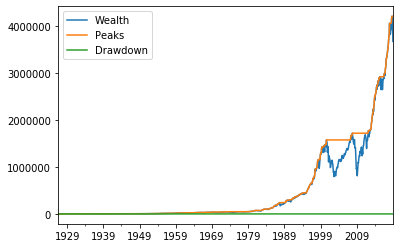

In [26]:
drawdown(returns['Large Cap']).plot()

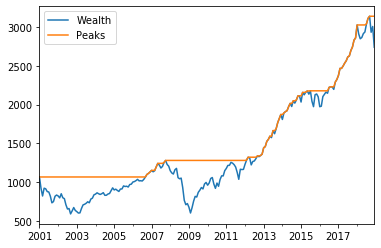

In [36]:
drawdown(returns['Large Cap']['2001':])[['Wealth', 'Peaks']].plot()

In [54]:
#Comparing the drawdowns of small- and large- caps
def drawdown_info(return_series: pd.Series, column):
    """Takes a series and returns a formatted String with the occurance and size of the max drawdown"""
    return 'The max drawdown occured {0!r} and was {1!r}'.format(drawdown(return_series[column])['Drawdown'].idxmin(), drawdown(return_series[column])['Drawdown'].min())

In [57]:
print(drawdown_info(returns["1945":], 'Large Cap'))

The max drawdown occured Period('2009-02', 'M') and was -0.5280945042309304


In [58]:
print(drawdown_info(returns["1945":], 'Small Cap'))

The max drawdown occured Period('1974-12', 'M') and was -0.7000596091967916
